<a href="https://colab.research.google.com/github/mohamedAwad413/MLprojects/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving img1.jpeg to img1.jpeg
Saving img2.jpeg to img2.jpeg


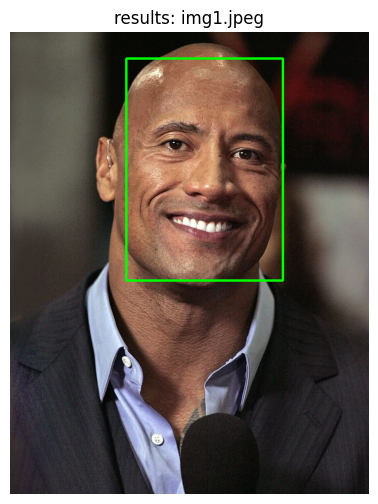

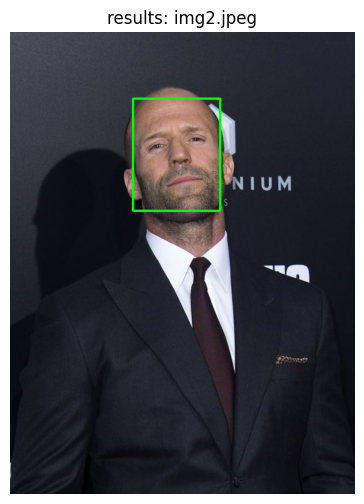

✅ Saved 2 in folder'faces_detected'


In [9]:
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import numpy as np
import os

# رفع عدة صور
from google.colab import files
uploaded = files.upload()

# إنشاء مجلد لحفظ الوجوه
output_dir = "faces_detected"
os.makedirs(output_dir, exist_ok=True)

# إنشاء كاشف الوجوه
detector = MTCNN()

face_count = 1  # عداد لتسمية الوجوه

for filename in uploaded.keys():
    # قراءة الصورة
    img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # الكشف عن الوجوه
    faces = detector.detect_faces(img_rgb)

    # رسم المربعات + قص الوجوه
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # قص الوجه
        face_crop = img_rgb[y:y+h, x:x+w]

        # حفظ الوجه كصورة منفصلة
        face_filename = os.path.join(output_dir, f"face_{face_count}.jpg")
        cv2.imwrite(face_filename, cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))
        face_count += 1

    # عرض النتيجة لكل صورة
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"results: {filename}")
    plt.show()

print(f"✅ Saved {face_count-1} in folder'{output_dir}'")
